# Convolutional Neural Networks with CIFAR-10 Dataset

## Objective
In this exercise, you will:
1. Utilize callback functions to halt training when a certain accuracy threshold is met.
2. Integrate convolutional and MaxPooling layers into a neural network to enhance image classification accuracy.
3. Grasp and demonstrate the benefits of convolution and MaxPooling in image classification tasks.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10


---

## Step 2: Load and Preprocess the Data
We'll load the CIFAR-10 dataset and then normalize the pixel values.


In [48]:
# TODO Load the dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# TODO Normalize the pixel values
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_images = normalization_layer(train_images).numpy()
test_images = normalization_layer(test_images).numpy()


---

## Step 3: Visualize the Data
Show some samples from the CIFAR-10 dataset.


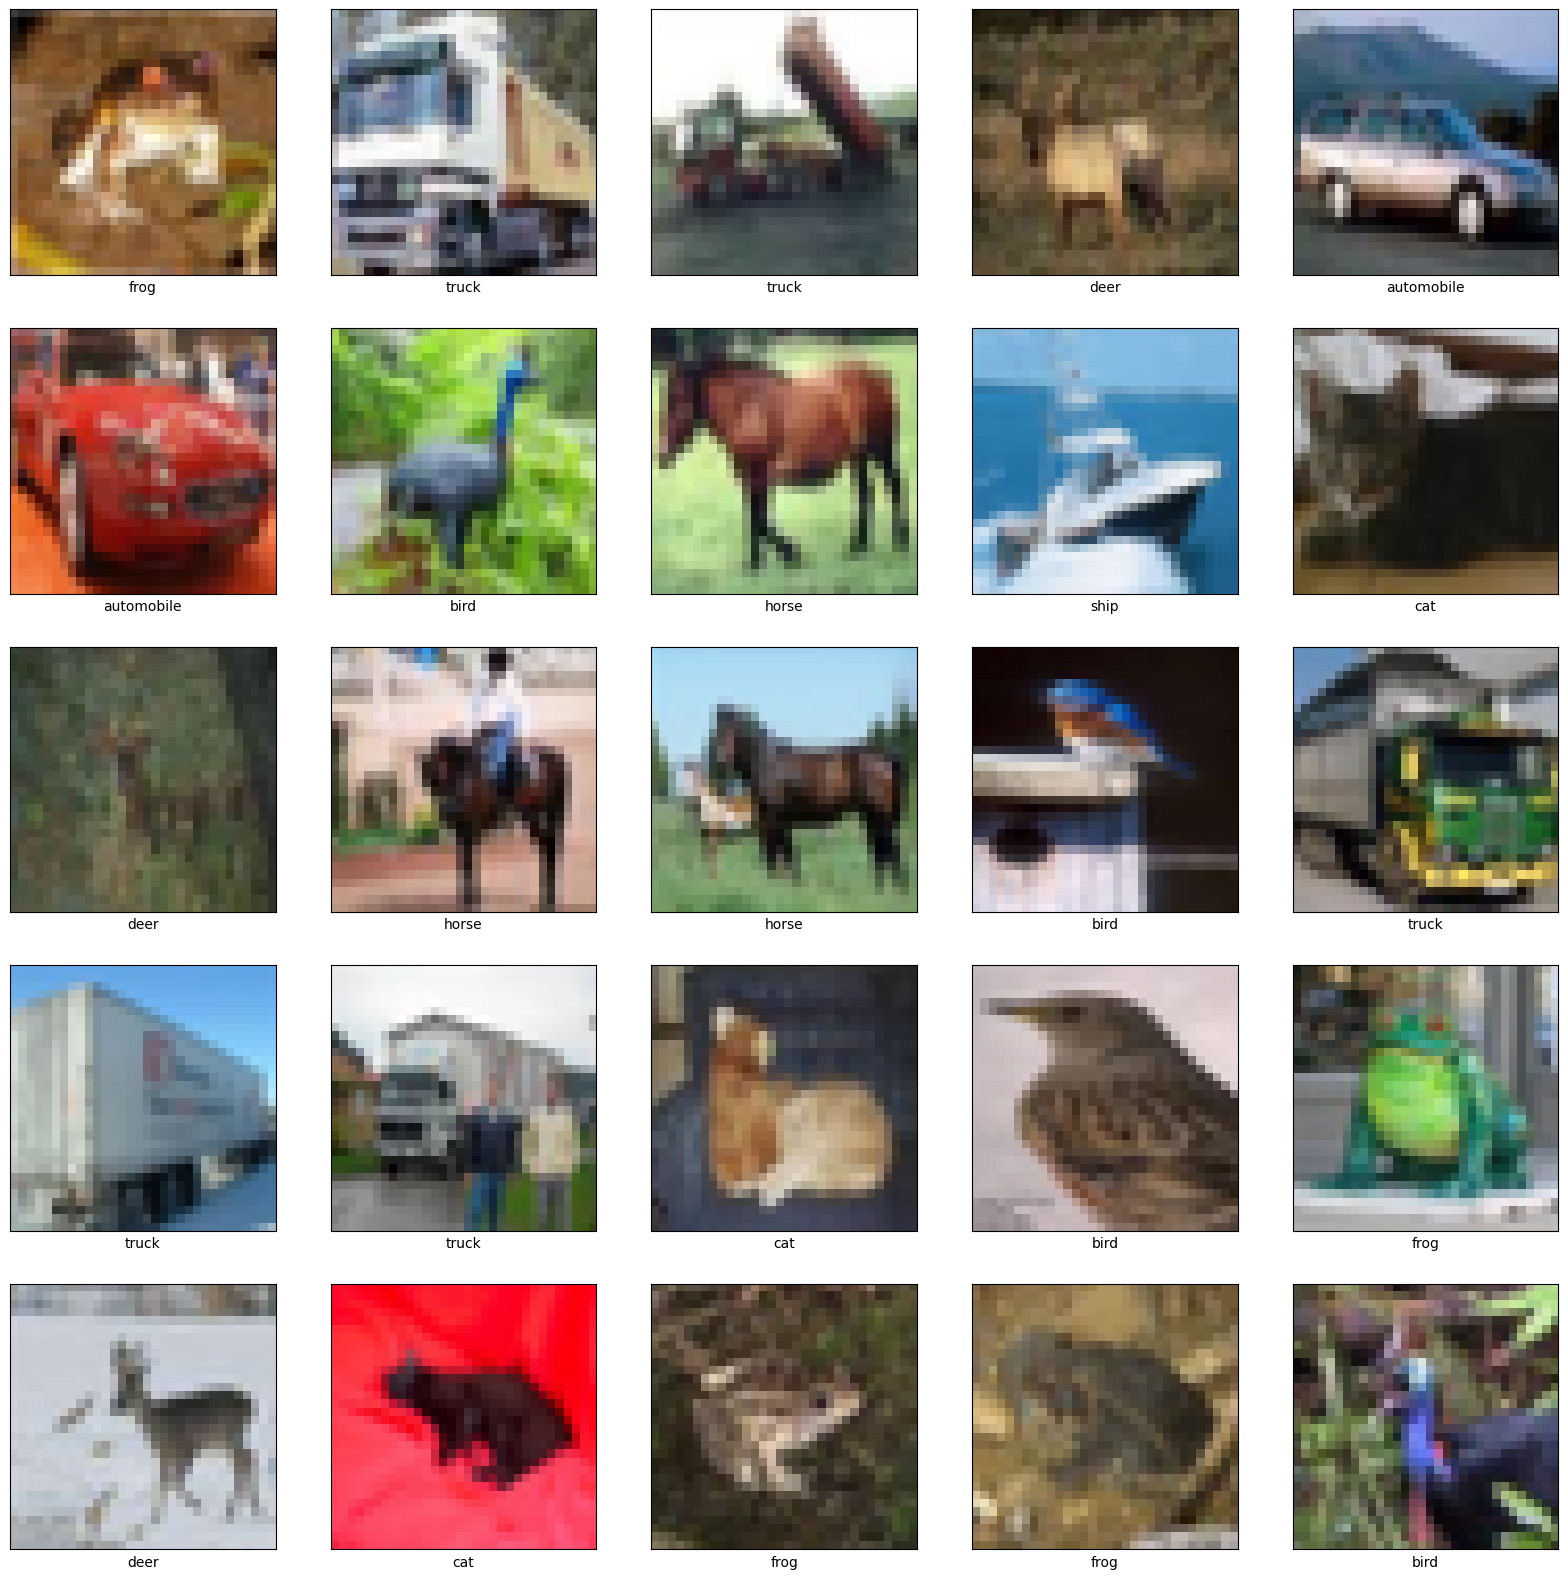

In [49]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


---

## Step 4: Define a Callback
Create a callback to monitor the model's accuracy and halt training when a specified accuracy is achieved.


In [50]:
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        '''
        Halts the training when the loss falls below 0.4

        Args:
            epoch (integer) - index of epoch (required but unused in the function definition below)
            logs (dict) - metric results from the training epoch
        '''

        # Check the loss
        if logs.get('accuracy') >= 0.90:

            # Stop if threshold is met
            print("\nAccuracy is greater than 0.9 so cancelling training!")
            self.model.stop_training = True

accuracy_callback = AccuracyCallback()

---

## Step 5: Build a Convolutional Neural Network
Construct a neural network that incorporates convolutional and MaxPooling layers.


In [51]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

---

## Step 6: Train the Model
Train the model using the training data and your callback function


In [52]:
train_ouput = model.fit(train_images, train_labels, epochs=10, callbacks=accuracy_callback, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 60ms/step - accuracy: 0.3185 - loss: 1.8422 - val_accuracy: 0.4804 - val_loss: 1.4228
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 62ms/step - accuracy: 0.5041 - loss: 1.3797 - val_accuracy: 0.5381 - val_loss: 1.2936
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 60ms/step - accuracy: 0.5466 - loss: 1.2606 - val_accuracy: 0.5504 - val_loss: 1.2579
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 62ms/step - accuracy: 0.5817 - loss: 1.1659 - val_accuracy: 0.6060 - val_loss: 1.1138
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.6106 - loss: 1.0953 - val_accuracy: 0.6174 - val_loss: 1.0750
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 59ms/step - accuracy: 0.6246 - loss: 1.0427 - val_accuracy: 0.6184 - val_loss: 1.0722
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 59ms/step - accuracy: 0.6459 - loss: 0.9953 - val_accuracy: 0.6418 - val_loss: 1.0103
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 60ms/step - accuracy: 0.

---

## Step 7: Evaluate the Model
Assess the model using the test data.


In [53]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 - 5s - 17ms/step - accuracy: 0.6553 - loss: 0.9889
Test Loss: 0.9889432787895203
Test Accuracy: 0.6553000211715698


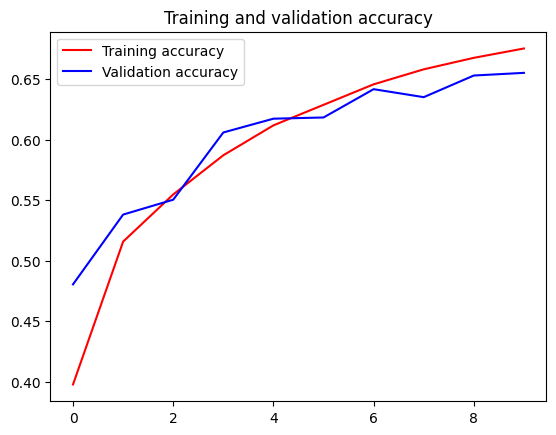

In [54]:
acc = train_ouput.history['accuracy']
val_acc = train_ouput.history['val_accuracy']
loss = train_ouput.history['loss']
val_loss = train_ouput.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

---

## Step 8 (Optional): Visualizing the Advantages of Convolution and MaxPooling
Demonstrate the benefits of convolution and MaxPooling. For this, we can extract the outputs from intermediate layers and visualize them. Play around with this to to find out what the model learns.


In [55]:
# Extracting outputs from the layers
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# For the first image in the training set
img = train_images[0]  # Ensure train_images[0] is normalized and shaped correctly
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Get the feature maps
activations = activation_model.predict(img)

# Visualizing the fourth channel of the output from the first layer (convolution)
plt.imshow(activations[0][0, :, :, 4], cmap='inferno')  # Fourth channel
plt.axis('off')
plt.show()

ValueError: The layer sequential_4 has never been called and thus has no defined input.